# Eddington Ratio Distribution Plot

In [1]:
import illustris_python as il
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

soxs : [WARNING  ] 2025-05-19 14:00:25,354 Setting 'soxs_data_dir' to /home/tnguser/.cache/soxs for this session. Please update your configuration if you want it somewhere else.


In [2]:
#PART 2: Simulation Specification
basePath = "../../../sims.TNG/TNG100-1/output/"
snap = 50 

In [3]:
# PART 3: Efficient vs Inefficient Acretors (Definition)

# Constants
c = 299792458  # speed of light in m/s
mp = 1.67 * 1e-27  # kg
G = 6.674 * 1e-11  # N m^2 kg^-2
sigma_t = 6.652 * 1e-29  # m^2
h = 0.6774
e_r = 0.2

shalo = il.groupcat.loadSubhalos(basePath, snap, fields=['SubhaloGrNr', 'SubhaloBHMdot', 'SubhaloBHMass'])
halo = il.groupcat.loadHalos(basePath, snap, fields =['Group_M_Crit500', 'GroupFirstSub'])

Mhalo = halo['Group_M_Crit500'] * 1e10 / h  #Msun
Mdot = shalo["SubhaloBHMdot"] * 10.22       #Msun / yr
M = shalo["SubhaloBHMass"]* 1e10 / h        #Msun
subID = np.arange(len(Mdot))
phid = shalo['SubhaloGrNr']
phm = Mhalo[phid[subID]]

group_firstsub = halo['GroupFirstSub']
group_firstsub = group_firstsub[group_firstsub != -1]
halo_centralID = np.array(group_firstsub)

central = np.zeros(len(M))
central[halo_centralID] = 1

indices = np.where((M > 1e6) & (phm > 10**10) & (central == 1))

Mdot_filtered = Mdot[indices]
M_filtered = M[indices]
subID_filtered = subID[indices]

Mdot_edd = (4 * np.pi * G * M_filtered * mp) / (e_r * c * sigma_t) / 3.16887646e-8  # M_sun/yr

fedd_static = Mdot_filtered / Mdot_edd
edd_ratio = fedd_static

efficiency = 10 * edd_ratio * e_r
efficiency[edd_ratio > 0.1] = e_r /(1-e_r)
Lbol = efficiency * Mdot_filtered * (1.989e+30 / 3.154e+7) * c**2 * 1e+7         #ergs/s
Lbol1 = e_r * Mdot_filtered * (1.989e+30 / 3.154e+7) * c**2 * 1e+7

Ledd = e_r * Mdot_edd * (1.989e+30 / 3.154e+7) * c**2 * 1e+7
fedd_dynamic = Lbol/Ledd
Ledd1 = (4*np.pi*G*M_filtered*mp)
print(fedd_static)
print(fedd_dynamic)

[2.0541120e-03 1.6052801e-04 3.5670204e-05 ... 2.6091145e-06 9.6126678e-06
 3.4869346e-10]
[4.21937609e-05 2.57692426e-07 1.27236351e-08 ... 6.80747897e-11
 9.24033787e-10 1.21587139e-18]
Total halos: 25309
High accretor Central AGNs: 918
High accretor Central Non-AGNs: 0
Non-accretor Central AGNs: 16175
Non-accretor Central Non-AGNs: 8216


## KDE Outline

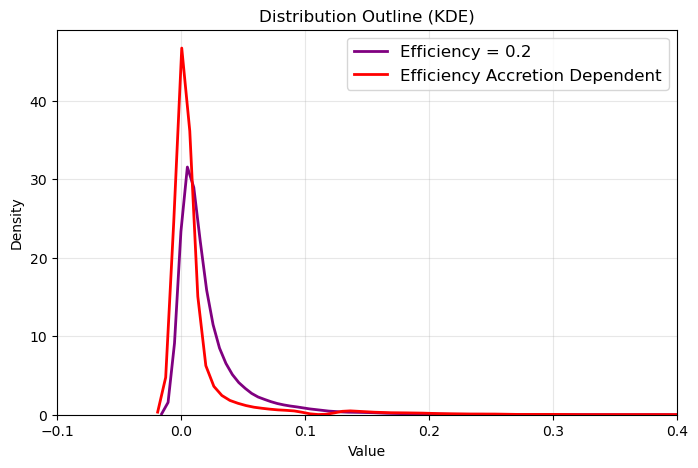

In [23]:
plt.figure(figsize=(8, 5))
sns.kdeplot(fedd_static, color='purple', linewidth=2, label="Efficiency = 0.2")
sns.kdeplot(fedd_dynamic, color='red', linewidth=2, label="Efficiency Accretion Dependent")
plt.title("Distribution Outline (KDE)")
plt.xlim(-0.1, 0.4)
#plt.yscale("log")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend(fontsize=12)
plt.grid(alpha = 0.3)
plt.show()

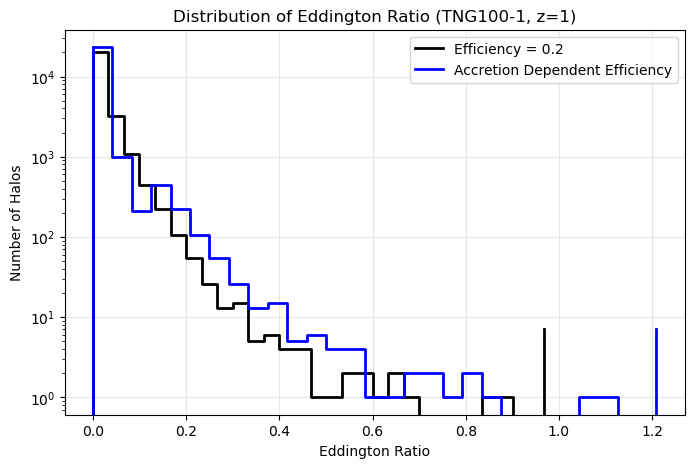

In [31]:
nbinss = 30
# Histogram data
counts, bin_edges = np.histogram(fedd_static, bins=nbinss)
counts2, bin_edges2 = np.histogram(fedd_dynamic, bins=nbinss)
bin_lefts = bin_edges[:-1]
bin_rights = bin_edges[1:]

bin_lefts2 = bin_edges2[:-1]
bin_rights2 = bin_edges2[1:]
plt.figure(figsize=(8, 5))

# Step plot (boxy outline)
plt.step(bin_lefts, counts, where='post', color='black', linewidth=2, label="Efficiency = 0.2")
plt.step(bin_lefts2, counts2, where='post', color='blue', linewidth=2, label="Accretion Dependent Efficiency")


# Add the missing vertical line at the start
plt.vlines(bin_lefts[0], 0, counts[0], color='black', linewidth=2)
plt.vlines(bin_lefts2[0], 0, counts2[0], color='blue', linewidth=2)

plt.title("Distribution of Eddington Ratio (TNG100-1, z=1)")
#plt.xlim(-0.01, 0.3)
plt.yscale("log")
plt.xlabel("Eddington Ratio")
plt.ylabel("Number of Halos")
plt.grid(alpha=0.3)
plt.legend()
plt.savefig("hist_no.png")
plt.show()


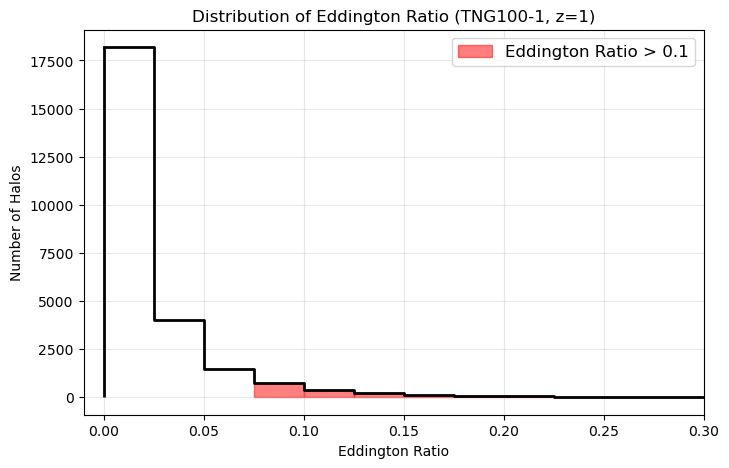

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch 

# Histogram data
counts, bin_edges = np.histogram(fedd_static, bins=40)
bin_lefts = bin_edges[:-1]
bin_rights = bin_edges[1:]

plt.figure(figsize=(8, 5))

# Step plot (boxy outline)
plt.step(bin_lefts, counts, where='post', color='black', linewidth=2)

# Add the missing vertical line at the start
plt.vlines(bin_lefts[0], 0, counts[0], color='black', linewidth=2)

# Fill area where x > 0.1
for left, right, count in zip(bin_lefts, bin_rights, counts):
    if right > 0.1:
        plt.fill_between([left, right], [count, count], color='red', alpha=0.5)

red_patch = Patch(color='red', alpha=0.5, label='Eddington Ratio > 0.1')
plt.legend(handles=[red_patch], fontsize=12)
plt.title("Distribution of Eddington Ratio (TNG100-1, z=1)")
plt.xlim(-0.01, 0.3)
plt.xlabel("Eddington Ratio")
plt.ylabel("Number of Halos")
plt.grid(alpha=0.3)
plt.savefig("hist_red.png")
plt.show()


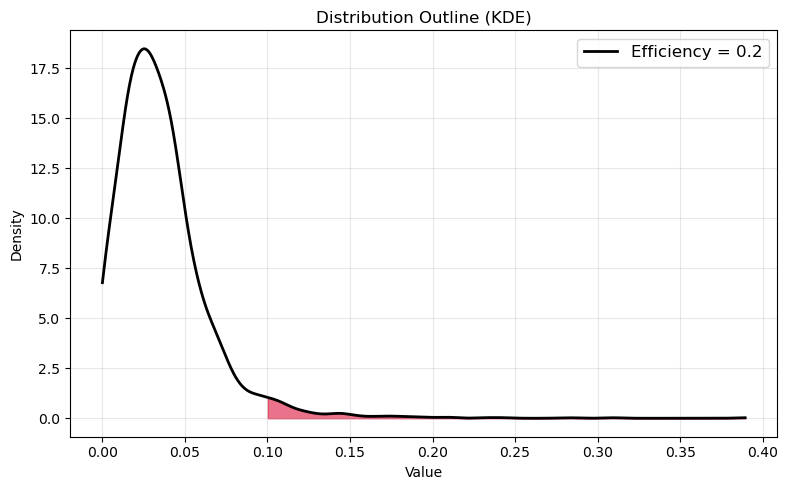

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# KDE object
kde = gaussian_kde(fedd_static)
x_vals = np.linspace(min(fedd_static), max(fedd_static), 1000)
y_vals = kde(x_vals)

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, color='black', linewidth=2, label="Efficiency = 0.2")

# Shade area under the curve where x > 0.2 and y > 0.1
mask = (x_vals > 0.1)# & (y_vals > 0.1)
plt.fill_between(x_vals, y_vals, 0, where=mask, color='crimson', alpha=0.6)

# Vertical line at fedd_static = 0.2
#plt.axvline(0.1, color='black', linestyle='--', linewidth=1, ymin=0)
#plt.plot([0.1, 0.1], [0, kde(0.1)], color='black', linestyle='--', linewidth=1)

# Horizontal line at density = 0.1
#plt.axhline(0.1, color='gray', linestyle='dashed', linewidth=1)

# Labels and title
plt.title("Distribution Outline (KDE)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()